## ML ASSIGNMENTS 

In [55]:
!pip install ucimlrepo
!pip install tabulate

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


In [59]:
from scipy.stats import ttest_ind, t
from scipy.stats import chi2_contingency, chi2
from scipy.stats import skew, kurtosis

In [4]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
adult = fetch_ucirepo(id=2) 
  
# data (as pandas dataframes) 
X = adult.data.features 
y = adult.data.targets 
  
# metadata 
print(adult.metadata) 
  
# variable information 
print(adult.variables) 


{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether annual income of an individual exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Tue Sep 24 2024', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': "Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the fol

### ASSIGNMENT 2

### First few rows of the dataset using the head() ---- sequential order rows

In [5]:
# X.head()

In [6]:
# y.head()

In [7]:
# X.head(3)

In [8]:
# y.head(3)

### Using sample()

#### DataFrame.sample(
####    n=None,
####    frac=None,
####    replace=False,
####     weights=None,
####   random_state=None,
####     axis=None,
####     ignore_index=False
####   ) 

#### Sampling : Sampling is the process of selecting a subset of data (a sample) from a larger dataset or population to make statistical inferences or train models.

#### 1. Sample()---- uniformly random rows---all the rows has the same probability of getting picked 

In [125]:
# X.sample()


In [126]:
# y.sample()

#### 2. Sample(n)

In [127]:
# X.sample(5)

In [128]:
# y.sample(5)

#### 3. sample(frac=0.1)---- 10% of the dataset 

In [129]:
# X.sample(frac=0.1)

#### 4. Sample(n,weights,random_state)--- show biased sample data and random_state is the seed value that sets the random numbers generated

In [9]:
adult_df = pd.concat([X, y], axis=1)
class_counts = adult_df['income'].value_counts()
total = len(adult_df)
weight_map = (total / class_counts).to_dict()
weights = adult_df['income'].map(weight_map)
adult_df.sample(n=5, weights=weights, random_state=42)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
24430,38,Private,193372,Some-college,10,Never-married,Exec-managerial,Own-child,White,Female,0,0,40,United-States,<=50K
47210,49,Private,272780,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,15024,0,60,Mexico,>50K.
40138,59,Self-emp-inc,155259,Some-college,10,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,20,United-States,<=50K.
35759,51,Private,98719,HS-grad,9,Divorced,Handlers-cleaners,Unmarried,White,Male,0,0,40,United-States,<=50K.
10204,30,Private,198183,Assoc-voc,11,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,40,United-States,<=50K


### info()

In [131]:
# adult_df.info()

### isnull()

In [132]:
# adult_df.isnull()

In [133]:
# adult_df.isnull().sum()

### describe()

In [134]:
# adult_df.describe()

In [135]:
#  adult_df.duplicated().sum()

In [136]:
# adult_df[adult_df.duplicated()]

## ASSIGNMET-3

### What is HYPOTHESIS testing?

####             Hypothesis testing is a structured statistical framework used to make data-driven decisions about populations or processes based on sample data.

### Why Do We Need Hypothesis Testing?

#### Avoid false discoveries: Without it, many observed “effects” may be random noise.

#### Quantify uncertainty: Provides numeric measure (p-value) to assess how surprising data is under null.

#### Guide business or scientific decisions: From A/B tests to clinical trials.

#### Maintain reproducibility: Results can be independently tested and verified.

#### Facilitate communication: Formal language helps analysts communicate evidence to non-technical stakeholders.

### Types of Hypotheses

#### Null hypothesis (H₀): The "status quo" or no effect/difference.
#### Alternative hypothesis (H₁ or Ha): What you want to prove (there is an effect).
#### Hypothesis can be one-sided (effect in one direction only) or two-sided (any difference).

###  Parametric vs Non-Parametric Tests :

| **Aspect**              | **Parametric Tests**                                   | **Non-Parametric Tests**                              |
| ----------------------- | ------------------------------------------------------ | ----------------------------------------------------- |
| Assumptions             | Normal distribution, equal variance (homoscedasticity) | No distribution assumption (distribution-free)        |
| Data Types              | Interval or Ratio data                                 | Ordinal, ranked, skewed interval data                 |
| Example Tests           | t-test, ANOVA, z-test                                  | Mann-Whitney U, Wilcoxon, Kruskal-Wallis, Friedman    |
| Sample Size Requirement | Works best when n > 30                                 | Works well with small sample sizes                    |
| Statistical Power       | High (when assumptions met)                            | Lower, but robust to violations                       |
| Use Case Example        | Comparing average blood pressure across treatments     | Comparing patient satisfaction scores (ordinal scale) |


### Core Concepts:

| Concept                         | Description                                                                 |
| ------------------------------- | --------------------------------------------------------------------------- |
| **Null Hypothesis (H₀)**        | The assumption that there is **no effect**, difference, or relationship     |
| **Alternative Hypothesis (H₁)** | The assumption that there **is an effect**, difference, or relationship     |
| **α (alpha)**                   | Probability of making a **Type I error** (rejecting a true H₀)              |
| **β (beta)**                    | Probability of making a **Type II error** (failing to reject a false H₀)    |
| **Power (1 − β)**               | Probability of **correctly rejecting** a false null (detecting true effect) |


### Step-by-Step Hypothesis Testing Workflow :

| Step                          | Description                                                   | Why Important?                                             | 
| ----------------------------- | ------------------------------------------------------------- | ------------------------------------------------------
| 1. Define H₀ and H₁           | Clearly state null and alternative hypotheses                 | Clarity & focus. Without this, analysis can be meaningless | 
| 2. Choose α level             | Set significance level (e.g., 0.05)                           | Controls risk of false positives                           |
| 3. Collect data               | Use proper sampling, data collection                          | Good data quality is critical for valid conclusions        |                      |
| 4. Select test & assumptions  | Choose test (t-test, chi-square, etc.) and verify assumptions | Ensures test validity                                      |                |
| 5. Calculate test statistic   | Compute summary statistic from data                           | Quantifies evidence against H₀                             |                               |
| 6. Compute p-value            | Probability of data under H₀                                  | Basis for decision-making                                  |   |
| 7. Make decision              | Reject or fail to reject H₀ based on p-value vs α             | Objective decision                                         |
| 8. Interpret & report results | Explain in context with domain knowledge                      | Helps stakeholders understand implications                 |


## ASSIGNMENT -4 

### Hypothesis Testing

In [10]:
# === NUMERICAL FEATURES with t-distribution ===
print("### Numerical Features (t-test with critical value plot) ###\n")
alpha = 0.05
for col in num_cols:
    if col != 'income':
        group1 = adult_df[adult_df['income'] == '<=50K'][col]
        group2 = adult_df[adult_df['income'] == '>50K'][col]

        # T-test
        stat, p = ttest_ind(group1, group2, nan_policy='omit')
        
        # Degrees of freedom for Welch's t-test approximation
        n1, n2 = group1.dropna().shape[0], group2.dropna().shape[0]
        dof = min(n1, n2) - 1  # Conservative estimate
        t_crit = t.ppf(1 - alpha/2, df=dof)

        # Print test result
        print(f"{col}: t-statistic = {stat:.4f}, p = {p:.4f}, t-critical = ±{t_crit:.2f} {'-- Significant' if p < alpha else ''}")

        # === Plot 1: KDE plot
        plt.figure(figsize=(8, 5))
        sns.kdeplot(group1, label='<=50K', fill=True)
        sns.kdeplot(group2, label='>50K', fill=True)
        plt.axvline(group1.mean(), color='blue', linestyle='--', label='Mean <=50K')
        plt.axvline(group2.mean(), color='orange', linestyle='--', label='Mean >50K')
        plt.title(f"{col}\nt = {stat:.2f}, p = {p:.4f} {'(Significant)' if p < alpha else '(Not Significant)'}")
        plt.xlabel(col)
        plt.ylabel("Density")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

        # === Plot 2: t-distribution with t-stat and critical values
        x = np.linspace(-5, 5, 500)
        y = t.pdf(x, df=dof)
        plt.figure(figsize=(8, 4))
        plt.plot(x, y, label='t-distribution')
        plt.fill_between(x, y, where=(x <= -t_crit) | (x >= t_crit), color='red', alpha=0.3, label='Rejection region')
        plt.axvline(stat, color='black', linestyle='--', label=f't-stat = {stat:.2f}')
        plt.axvline(-t_crit, color='red', linestyle='--', label=f'-t_crit = {-t_crit:.2f}')
        plt.axvline(t_crit, color='red', linestyle='--', label=f'+t_crit = {t_crit:.2f}')
        plt.title(f"t-Distribution for {col} (dof ≈ {dof})")
        plt.xlabel("t-value")
        plt.ylabel("Probability Density")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()


### Numerical Features (t-test with critical value plot) ###



NameError: name 'num_cols' is not defined

In [ ]:
print("\n### Categorical Features (Chi-square test with critical value plot) ###\n")

for col in cat_cols:
    if col != 'income':
        table = pd.crosstab(adult_df[col], adult_df['income'])
        chi2_stat, p, dof, expected = chi2_contingency(table)
        crit_val = chi2.ppf(1 - alpha, dof)

        print(f"{col}: chi2 = {chi2_stat:.2f}, dof = {dof}, crit = {crit_val:.2f}, p = {p:.4f} {'-- Significant' if p < alpha else ''}")

        # === Plot 1: Stacked bar plot
        prop_table = table.div(table.sum(1), axis=0)
        prop_table.plot(kind='bar', stacked=True, figsize=(8, 5), colormap='Set2')

        plt.title(f"{col}\nChi² = {chi2_stat:.2f}, p = {p:.4f} {'(Significant)' if p < alpha else '(Not Significant)'}")
        plt.ylabel('Proportion')
        plt.xlabel(col)
        plt.legend(title='Income')
        plt.grid(True, axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()

        # === Plot 2: Chi-square distribution
        x = np.linspace(0, chi2_stat + crit_val + 5, 500)
        y = chi2.pdf(x, dof)
        plt.figure(figsize=(8, 4))
        plt.plot(x, y, label=f"Chi² Distribution (dof = {dof})")
        plt.fill_between(x, y, where=(x >= crit_val), color='red', alpha=0.3, label='Rejection region')
        plt.axvline(chi2_stat, color='black', linestyle='--', label=f"Observed χ² = {chi2_stat:.2f}")
        plt.axvline(crit_val, color='red', linestyle='--', label=f"Critical χ² = {crit_val:.2f}")
        plt.title(f"Chi-square Distribution for {col}")
        plt.xlabel("Chi² value")
        plt.ylabel("Probability Density")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()


### type -1 error type -2 error/ Power Analysis : 

| Error Type            | What It Means                         | When It Occurs                       | Consequences                                           | How To Control                                                   |
| --------------------- | ------------------------------------- | ------------------------------------ | ------------------------------------------------------ | ---------------------------------------------------------------- |
| **Type I error (α)**  | Rejecting H₀ when H₀ is actually true | Declaring an effect when none exists | Wasted resources, wrong business/clinical decisions    | Set α threshold (usually 0.05 or 0.01); reduce by stricter tests |
| **Type II error (β)** | Failing to reject H₀ when H₁ is true  | Missing a real effect                | Missed opportunity, failure to detect important change | Increase sample size, reduce noise, increase power (1−β)         |


In [11]:
# Identify numerical columns
numeric_cols = adult_df.select_dtypes(include=['int64', 'float64']).columns
group_col = 'income'
group1_label = '<=50K'
group2_label = '>50K'

# Simulation settings
alpha = 0.05
sample_size = 50
n_sim = 1000

# Store results
results = []

for col in numeric_cols:
    g1_data = adult_df[adult_df[group_col] == group1_label][col].values
    g2_data = adult_df[adult_df[group_col] == group2_label][col].values

    if len(g1_data) < sample_size * 2 or len(g2_data) < sample_size:
        continue  # skip if not enough data

    type1_errors = 0
    type2_errors = 0

    # Type I Error: H₀ is true (compare same group)
    for _ in range(n_sim):
        s1 = np.random.choice(g1_data, sample_size, replace=False)
        s2 = np.random.choice(g1_data, sample_size, replace=False)
        _, p = ttest_ind(s1, s2)
        if p < alpha:
            type1_errors += 1

    # Type II Error: H₁ is true (compare different groups)
    for _ in range(n_sim):
        s1 = np.random.choice(g1_data, sample_size, replace=False)
        s2 = np.random.choice(g2_data, sample_size, replace=False)
        _, p = ttest_ind(s1, s2)
        if p >= alpha:
            type2_errors += 1

    results.append({
        'column': col,
        'type1_error': round(type1_errors / n_sim, 3),
        'type2_error': round(type2_errors / n_sim, 3),
        'power': round(1 - (type2_errors / n_sim), 3)
    })

# Display as DataFrame
error_stats_df = pd.DataFrame(results)
print(error_stats_df)


           column  type1_error  type2_error  power
0             age        0.053        0.161  0.839
1          fnlwgt        0.057        0.954  0.046
2   education-num        0.039        0.010  0.990
3    capital-gain        0.028        0.360  0.640
4    capital-loss        0.027        0.705  0.295
5  hours-per-week        0.062        0.188  0.812


### Type I Error (False Positive Rate):

#### Probability of rejecting a true null hypothesis. All columns are within the typical alpha level of 0.05–0.06, indicating moderate control over false positives.

### Type II Error (False Negative Rate):

#### Probability of not rejecting a false null hypothesis. fnlwgt has an extremely high Type II error (0.954) → It's failing to detect true effects most of the time. education-num has very low Type II error (0.010), making it very reliable.(but this column represents categorical not numerical while cleaning we cleaned it)

### Power (1 - Type II Error):

#### Probability of correctly rejecting a false null hypothesis.fnlwgt has the lowest power (0.046), indicating it's a very weak predictor in your model.hours-per-week and age have relatively high power (0.825 and 0.841 respectively), suggesting they are valuable features.

#### Strong Predictors: age, hours-per-week — high power, low Type II error.
#### Weak Predictors: fnlwgt — very high Type II error, extremely low power. Likely contributing noise,capital-loss — moderate Type II error and low power (0.324).
#### Moderate Predictors: capital-gain — moderate power (0.602).

## ASSIGNMENT -5 

### cleaning 

#### finding and observing the duplicates

In [12]:
duplicates = adult_df[adult_df.duplicated(keep=False)]

print(f"Total duplicate rows (including originals): {len(duplicates)}")

# Group duplicates by all columns (so identical rows are grouped)
duplicate_groups = duplicates.groupby(list(adult_df.columns))

print(f"Number of unique duplicate groups: {len(duplicate_groups)}")

# Display first 5 duplicate groups side-by-side for comparison
print("\nShowing first 5 groups of full duplicate rows:")

for i, (group_key, group_df) in enumerate(duplicate_groups):
    if i >= 30:
        break
    print(f"\nGroup {i+1} (Group key: {group_key}):")
    display(group_df)


Total duplicate rows (including originals): 57
Number of unique duplicate groups: 28

Showing first 5 groups of full duplicate rows:

Group 1 (Group key: (18, 'Self-emp-inc', 378036, '12th', 8, 'Never-married', 'Farming-fishing', 'Own-child', 'White', 'Male', 0, 0, 10, 'United-States', '<=50K.')):


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
36461,18,Self-emp-inc,378036,12th,8,Never-married,Farming-fishing,Own-child,White,Male,0,0,10,United-States,<=50K.
48521,18,Self-emp-inc,378036,12th,8,Never-married,Farming-fishing,Own-child,White,Male,0,0,10,United-States,<=50K.



Group 2 (Group key: (19, 'Private', 97261, 'HS-grad', 9, 'Never-married', 'Farming-fishing', 'Not-in-family', 'White', 'Male', 0, 0, 40, 'United-States', '<=50K')):


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
17673,19,Private,97261,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,40,United-States,<=50K
18698,19,Private,97261,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,40,United-States,<=50K



Group 3 (Group key: (19, 'Private', 138153, 'Some-college', 10, 'Never-married', 'Adm-clerical', 'Own-child', 'White', 'Female', 0, 0, 10, 'United-States', '<=50K')):


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
6990,19,Private,138153,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,10,United-States,<=50K
21318,19,Private,138153,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,10,United-States,<=50K



Group 4 (Group key: (19, 'Private', 146679, 'Some-college', 10, 'Never-married', 'Exec-managerial', 'Own-child', 'Black', 'Male', 0, 0, 30, 'United-States', '<=50K')):


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
15189,19,Private,146679,Some-college,10,Never-married,Exec-managerial,Own-child,Black,Male,0,0,30,United-States,<=50K
21490,19,Private,146679,Some-college,10,Never-married,Exec-managerial,Own-child,Black,Male,0,0,30,United-States,<=50K



Group 5 (Group key: (19, 'Private', 251579, 'Some-college', 10, 'Never-married', 'Other-service', 'Own-child', 'White', 'Male', 0, 0, 14, 'United-States', '<=50K')):


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
3917,19,Private,251579,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,14,United-States,<=50K
31993,19,Private,251579,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,14,United-States,<=50K



Group 6 (Group key: (20, 'Private', 107658, 'Some-college', 10, 'Never-married', 'Tech-support', 'Not-in-family', 'White', 'Female', 0, 0, 10, 'United-States', '<=50K')):


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
5805,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,<=50K
11631,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,<=50K



Group 7 (Group key: (21, 'Private', 243368, 'Preschool', 1, 'Never-married', 'Farming-fishing', 'Not-in-family', 'White', 'Male', 0, 0, 50, 'Mexico', '<=50K')):


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
8080,21,Private,243368,Preschool,1,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,50,Mexico,<=50K
15059,21,Private,243368,Preschool,1,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,50,Mexico,<=50K



Group 8 (Group key: (21, 'Private', 250051, 'Some-college', 10, 'Never-married', 'Prof-specialty', 'Own-child', 'White', 'Female', 0, 0, 10, 'United-States', '<=50K')):


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
4767,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,<=50K
9171,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,<=50K



Group 9 (Group key: (23, 'Private', 240137, '5th-6th', 3, 'Never-married', 'Handlers-cleaners', 'Not-in-family', 'White', 'Male', 0, 0, 55, 'Mexico', '<=50K')):


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
21103,23,Private,240137,5th-6th,3,Never-married,Handlers-cleaners,Not-in-family,White,Male,0,0,55,Mexico,<=50K
25872,23,Private,240137,5th-6th,3,Never-married,Handlers-cleaners,Not-in-family,White,Male,0,0,55,Mexico,<=50K



Group 10 (Group key: (24, 'Private', 194630, 'Bachelors', 13, 'Never-married', 'Prof-specialty', 'Not-in-family', 'White', 'Male', 0, 0, 35, 'United-States', '<=50K.')):


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
33049,24,Private,194630,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,35,United-States,<=50K.
33425,24,Private,194630,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,35,United-States,<=50K.



Group 11 (Group key: (25, 'Private', 195994, '1st-4th', 2, 'Never-married', 'Priv-house-serv', 'Not-in-family', 'White', 'Female', 0, 0, 40, 'Guatemala', '<=50K')):


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
5842,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala,<=50K
13084,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala,<=50K
22300,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala,<=50K



Group 12 (Group key: (25, 'Private', 308144, 'Bachelors', 13, 'Never-married', 'Craft-repair', 'Not-in-family', 'White', 'Male', 0, 0, 40, 'Mexico', '<=50K')):


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
4325,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
4881,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K



Group 13 (Group key: (27, 'Private', 255582, 'HS-grad', 9, 'Never-married', 'Machine-op-inspct', 'Not-in-family', 'White', 'Female', 0, 0, 40, 'United-States', '<=50K')):


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
5579,27,Private,255582,HS-grad,9,Never-married,Machine-op-inspct,Not-in-family,White,Female,0,0,40,United-States,<=50K
28230,27,Private,255582,HS-grad,9,Never-married,Machine-op-inspct,Not-in-family,White,Female,0,0,40,United-States,<=50K



Group 14 (Group key: (28, 'Private', 274679, 'Masters', 14, 'Never-married', 'Prof-specialty', 'Not-in-family', 'White', 'Male', 0, 0, 50, 'United-States', '<=50K')):


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
8679,28,Private,274679,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,50,United-States,<=50K
26313,28,Private,274679,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,50,United-States,<=50K



Group 15 (Group key: (29, 'Private', 36440, 'Bachelors', 13, 'Never-married', 'Adm-clerical', 'Not-in-family', 'White', 'Female', 0, 0, 40, 'United-States', '<=50K.')):


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
41810,29,Private,36440,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K.
43773,29,Private,36440,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K.



Group 16 (Group key: (30, 'Private', 144593, 'HS-grad', 9, 'Never-married', 'Other-service', 'Not-in-family', 'Black', 'Male', 0, 0, 40, '?', '<=50K')):


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
16975,30,Private,144593,HS-grad,9,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,?,<=50K
18555,30,Private,144593,HS-grad,9,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,?,<=50K



Group 17 (Group key: (30, 'Private', 180317, 'Assoc-voc', 11, 'Divorced', 'Machine-op-inspct', 'Not-in-family', 'White', 'Male', 0, 0, 40, 'United-States', '<=50K.')):


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
39582,30,Private,180317,Assoc-voc,11,Divorced,Machine-op-inspct,Not-in-family,White,Male,0,0,40,United-States,<=50K.
46409,30,Private,180317,Assoc-voc,11,Divorced,Machine-op-inspct,Not-in-family,White,Male,0,0,40,United-States,<=50K.



Group 18 (Group key: (35, 'Private', 379959, 'HS-grad', 9, 'Divorced', 'Other-service', 'Not-in-family', 'White', 'Female', 0, 0, 40, 'United-States', '<=50K')):


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
16846,35,Private,379959,HS-grad,9,Divorced,Other-service,Not-in-family,White,Female,0,0,40,United-States,<=50K
32404,35,Private,379959,HS-grad,9,Divorced,Other-service,Not-in-family,White,Female,0,0,40,United-States,<=50K



Group 19 (Group key: (37, 'Private', 52870, 'Bachelors', 13, 'Married-civ-spouse', 'Exec-managerial', 'Husband', 'White', 'Male', 0, 0, 40, 'United-States', '<=50K.')):


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
33880,37,Private,52870,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,<=50K.
43750,37,Private,52870,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,<=50K.



Group 20 (Group key: (38, 'Private', 207202, 'HS-grad', 9, 'Married-civ-spouse', 'Machine-op-inspct', 'Husband', 'White', 'Male', 0, 0, 48, 'United-States', '>50K')):


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
4940,38,Private,207202,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,48,United-States,>50K
29157,38,Private,207202,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,48,United-States,>50K



Group 21 (Group key: (39, 'Private', 30916, 'HS-grad', 9, 'Married-civ-spouse', 'Craft-repair', 'Husband', 'White', 'Male', 0, 0, 40, 'United-States', '<=50K')):


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
25624,39,Private,30916,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
28846,39,Private,30916,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K



Group 22 (Group key: (42, 'Private', 204235, 'Some-college', 10, 'Married-civ-spouse', 'Prof-specialty', 'Husband', 'White', 'Male', 0, 0, 40, 'United-States', '>50K')):


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
10367,42,Private,204235,Some-college,10,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,>50K
28522,42,Private,204235,Some-college,10,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,>50K



Group 23 (Group key: (44, 'Private', 367749, 'Bachelors', 13, 'Never-married', 'Prof-specialty', 'Not-in-family', 'White', 'Female', 0, 0, 45, 'Mexico', '<=50K')):


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
17916,44,Private,367749,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,45,Mexico,<=50K
22367,44,Private,367749,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,45,Mexico,<=50K



Group 24 (Group key: (46, 'Private', 133616, 'Some-college', 10, 'Divorced', 'Adm-clerical', 'Unmarried', 'White', 'Female', 0, 0, 40, 'United-States', '<=50K')):


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
11965,46,Private,133616,Some-college,10,Divorced,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30845,46,Private,133616,Some-college,10,Divorced,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K



Group 25 (Group key: (46, 'Private', 173243, 'HS-grad', 9, 'Married-civ-spouse', 'Craft-repair', 'Husband', 'White', 'Male', 0, 0, 40, 'United-States', '<=50K')):


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
16297,46,Private,173243,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
17040,46,Private,173243,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K



Group 26 (Group key: (49, 'Private', 31267, '7th-8th', 4, 'Married-civ-spouse', 'Craft-repair', 'Husband', 'White', 'Male', 0, 0, 40, 'United-States', '<=50K')):


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
7920,49,Private,31267,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
21875,49,Private,31267,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K



Group 27 (Group key: (49, 'Self-emp-not-inc', 43479, 'Some-college', 10, 'Married-civ-spouse', 'Craft-repair', 'Husband', 'White', 'Male', 0, 0, 40, 'United-States', '<=50K')):


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
7053,49,Self-emp-not-inc,43479,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
22494,49,Self-emp-not-inc,43479,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K



Group 28 (Group key: (90, 'Private', 52386, 'Some-college', 10, 'Never-married', 'Other-service', 'Not-in-family', 'Asian-Pac-Islander', 'Male', 0, 0, 35, 'United-States', '<=50K')):


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
2303,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
5104,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K


#### Remove duplicates

In [13]:
adult_df[adult_df.duplicated()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 4881 to 48521
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             29 non-null     int64 
 1   workclass       29 non-null     object
 2   fnlwgt          29 non-null     int64 
 3   education       29 non-null     object
 4   education-num   29 non-null     int64 
 5   marital-status  29 non-null     object
 6   occupation      29 non-null     object
 7   relationship    29 non-null     object
 8   race            29 non-null     object
 9   sex             29 non-null     object
 10  capital-gain    29 non-null     int64 
 11  capital-loss    29 non-null     int64 
 12  hours-per-week  29 non-null     int64 
 13  native-country  29 non-null     object
 14  income          29 non-null     object
dtypes: int64(6), object(9)
memory usage: 3.6+ KB


In [14]:
adult_df = adult_df.drop_duplicates()


In [15]:
adult_df[adult_df.duplicated()].isnull().sum()

age               0.0
workclass         0.0
fnlwgt            0.0
education         0.0
education-num     0.0
marital-status    0.0
occupation        0.0
relationship      0.0
race              0.0
sex               0.0
capital-gain      0.0
capital-loss      0.0
hours-per-week    0.0
native-country    0.0
income            0.0
dtype: float64

In [16]:
adult_df[adult_df.duplicated()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             0 non-null      int64 
 1   workclass       0 non-null      object
 2   fnlwgt          0 non-null      int64 
 3   education       0 non-null      object
 4   education-num   0 non-null      int64 
 5   marital-status  0 non-null      object
 6   occupation      0 non-null      object
 7   relationship    0 non-null      object
 8   race            0 non-null      object
 9   sex             0 non-null      object
 10  capital-gain    0 non-null      int64 
 11  capital-loss    0 non-null      int64 
 12  hours-per-week  0 non-null      int64 
 13  native-country  0 non-null      object
 14  income          0 non-null      object
dtypes: int64(6), object(9)
memory usage: 0.0+ bytes


In [17]:
adult_df['workclass'].value_counts()


Private             33879
Self-emp-not-inc     3861
Local-gov            3136
State-gov            1981
?                    1836
Self-emp-inc         1694
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [18]:
adult_df['native-country'].value_counts(dropna=False)


United-States                 43810
Mexico                          947
?                               582
Philippines                     295
NaN                             274
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Poland                           87
Guatemala                        86
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                   

In [19]:
adult_df['occupation'].value_counts()


Prof-specialty       6167
Craft-repair         6107
Exec-managerial      6084
Adm-clerical         5608
Sales                5504
Other-service        4919
Machine-op-inspct    3019
Transport-moving     2355
Handlers-cleaners    2071
?                    1843
Farming-fishing      1487
Tech-support         1445
Protective-serv       983
Priv-house-serv       240
Armed-Forces           15
Name: occupation, dtype: int64

### cleaning occupation column

In [20]:
adult_df[(adult_df['occupation'] == '?') & (adult_df['workclass'] != '?')]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
5361,18,Never-worked,206359,10th,6,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
10845,23,Never-worked,188535,7th-8th,4,Divorced,?,Not-in-family,White,Male,0,0,35,United-States,<=50K
14772,17,Never-worked,237272,10th,6,Never-married,?,Own-child,White,Male,0,0,30,United-States,<=50K
20337,18,Never-worked,157131,11th,7,Never-married,?,Own-child,White,Female,0,0,10,United-States,<=50K
23232,20,Never-worked,462294,Some-college,10,Never-married,?,Own-child,Black,Male,0,0,40,United-States,<=50K
32304,30,Never-worked,176673,HS-grad,9,Married-civ-spouse,?,Wife,Black,Female,0,0,40,United-States,<=50K
32314,18,Never-worked,153663,Some-college,10,Never-married,?,Own-child,White,Male,0,0,4,United-States,<=50K


In [21]:
# Replace 'occupation' with 'Not Applicable' 
# only where occupation == '?' and workclass != '?'
adult_df.loc[
    (adult_df['occupation'] == '?') & (adult_df['workclass'] != '?'),
    'occupation'
] = 'Not Applicable'


In [22]:
adult_df[(adult_df['occupation'] == '?') & (adult_df['workclass'] != '?')]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income


In [23]:
(adult_df[(adult_df['occupation'].isnull()) & (adult_df['workclass'].notnull())])


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
41346,17,Never-worked,131593,11th,7,Never-married,NaN,Own-child,Black,Female,0,0,20,United-States,<=50K.
44168,20,Never-worked,273905,HS-grad,9,Married-spouse-absent,NaN,Other-relative,White,Male,0,0,35,United-States,<=50K.
46459,18,Never-worked,162908,11th,7,Never-married,NaN,Own-child,White,Male,0,0,35,United-States,<=50K.


In [24]:
adult_df.loc[
    (adult_df['occupation'].isnull()) & (adult_df['workclass'].notnull()),
    'occupation'
] = 'Not Applicable'


In [25]:
(adult_df[(adult_df['occupation'].isnull()) & (adult_df['workclass'].notnull())])

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income


In [26]:
# Step 1: Replace '?' in occupation with np.nan (so we treat '?' as missing)
adult_df['occupation'] = adult_df['occupation'].replace('?', np.nan)

# Step 2: Define a function to fill missing occupation in each group with mode
def fill_occupation_mode(group):
    mode_val = group.mode()
    if mode_val.empty:
        # If mode is empty (all NaNs), return group as is
        return group
    else:
        mode_val = mode_val[0]
        return group.fillna(mode_val)

# Step 3: Apply this function to occupation grouped by education
adult_df['occupation'] = adult_df.groupby('education')['occupation'].transform(fill_occupation_mode)


In [27]:
# Check if any missing or '?' remain
print(adult_df['occupation'].isnull().sum())  # Should be 0 if all filled
print((adult_df['occupation'] == '?').sum())  # Should be 0


0
0


### cleaning workclass

In [28]:
adult_df['workclass'].isnull().sum()

963

In [29]:
# Compute the mode of 'workclass'
mode_value = adult_df['workclass'].mode()[0]

# Fill only the missing (NaN) values in 'workclass' with the mode
adult_df['workclass'] = adult_df['workclass'].fillna(mode_value)



In [30]:
print(adult_df['workclass'].isnull().sum())  # Should be 0 if all filled
print((adult_df['workclass'] == '?').sum())  

0
1836


In [31]:

adult_df['workclass'] = adult_df['workclass'].replace('?', np.nan)

mode_value = adult_df['workclass'].mode()[0]

adult_df['workclass'] = adult_df['workclass'].fillna(mode_value)


In [32]:
print(adult_df['workclass'].isnull().sum())  # Should be 0 if all filled
print((adult_df['workclass'] == '?').sum())  

0
0


### imputing native_country column with mode 

In [33]:
mode_value = adult_df['native-country'].mode()[0]
adult_df['native-country'].fillna(mode_value, inplace=True)

In [34]:
adult_df['native-country'] = adult_df['native-country'].replace('?', np.nan)

mode_value = adult_df['native-country'].mode()[0]

# Impute safely
adult_df['native-country'] = adult_df['native-country'].fillna(mode_value)

In [35]:

adult_df['native-country'].isnull().sum()

0

In [36]:

adult_df['native-country'].value_counts()

United-States                 44666
Mexico                          947
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Poland                           87
Guatemala                        86
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                             46
Ecuador                     

### cleaning income column

In [37]:
print(adult_df['income'].value_counts())


<=50K     24698
<=50K.    12430
>50K       7839
>50K.      3846
Name: income, dtype: int64


In [38]:
# Remove trailing dots and strip spaces in 'income' column
adult_df['income'] = adult_df['income'].str.replace(r'\.', '', regex=True).str.strip()


In [39]:
print(adult_df['income'].value_counts())

<=50K    37128
>50K     11685
Name: income, dtype: int64


### type cast the education_num column

In [40]:
adult_df['education-num'] = adult_df['education-num'].astype('category')



In [41]:
# print(adult_df.dtypes)


In [42]:
adult_df['education-num'] = adult_df['education-num'].astype('object')
print(adult_df.dtypes)

age                int64
workclass         object
fnlwgt             int64
education         object
education-num     object
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object


## ASSIGNMENT 6

### What is UNIVERIATE ANALYSIS

####              Univariate analysis is the examination of one variable at a time. The goal is to summarize, visualize, and understand the distribution, central tendency, dispersion, and nature (e.g., categorical or numerical) of a single variable without considering relationships with other variables.

| **Univariate Step**               | **What You Do**                                                                | **Why It’s Important**                                                         | **Future Steps Impacted**                                                                      |
| --------------------------------- | ------------------------------------------------------------------------------ | ------------------------------------------------------------------------------ | ---------------------------------------------------------------------------------------------- |
| **1. Identify Variable Type**     | Determine if the variable is **categorical, numerical, ordinal, or binary**    | Different types require different treatments during modeling and preprocessing | 🔹 Feature encoding  <br> 🔹 Scaling <br> 🔹 Model selection (some models handle types better) |
| **2. Central Tendency**           | Compute **mean, median, mode**                                                 | Understand data center; detect skew; compare across groups                     | 🔹 Imputation strategies (e.g., fill NA with mean/median) <br> 🔹 Detect bias or imbalance     |
| **3. Dispersion / Spread**        | Calculate **range, IQR, variance, standard deviation**                         | Tells how spread out the data is; detects potential outliers                   | 🔹 Feature scaling (StandardScaler, RobustScaler) <br> 🔹 Identify unstable features           |
| **4. Shape of Distribution**      | Measure **skewness and kurtosis**; check for **symmetry and tail behavior**    | Skewed data may require transformation (e.g., log, sqrt)                       | 🔹 Feature transformation <br> 🔹 Decide normalization vs standardization                      |
| **5. Frequency Distribution**     | For categorical features: compute **count and proportion per class**           | Understand class balance; detect rare labels                                   | 🔹 Handle class imbalance <br> 🔹 Apply one-hot or target encoding                             |
| **6. Position & Percentiles**     | Get **min, max, Q1, median, Q3, percentiles**                                  | Useful for binning, normalization, outlier boundaries                          | 🔹 Binning or quantile encoding <br> 🔹 Normalization <br> 🔹 Outlier treatment                |
| **7. Outlier Detection**          | Use **boxplot**, **IQR method**, or **Z-score** to find outliers               | Outliers distort model training, affect mean/variance                          | 🔹 Outlier removal or capping <br> 🔹 Robust scaling                                           |
| **8. Visualization**              | Plot **histogram**, **boxplot**, **density plot**, **bar plot**, **countplot** | Spot patterns, skewness, gaps, modes visually                                  | 🔹 Visual EDA reporting <br> 🔹 Feature engineering <br> 🔹 Transformation choice              |
| **9. Detect Missing Values**      | Count missing (NaN) values and calculate missing percentage per column         | High-missing features might be removed; low-missing might be imputed           | 🔹 Missing value imputation (mean, median, mode, model-based)                                  |
| **10. Understand Variable Usage** | Ask: Is this variable informative? Redundant? Categorical or numerical target? | Helps in feature selection and model target understanding                      | 🔹 Target encoding strategies <br> 🔹 Dropping useless features                                |


# Categorical Features:

### Cardinality : The number of unique categories/levels in a categorical feature.

| **Cardinality Level** | **Unique Categories (Range)** | **Why It Matters**                                                         | **Suggested Actions**                                   |
| --------------------- | ----------------------------- | -------------------------------------------------------------------------- | ------------------------------------------------------- |
| **Low**               | 2 – 10                        | Easy to handle and encode without adding complexity                        | One-hot encoding                                        |
| **Medium**            | 11 – 20                       | Manageable; may require more efficient encoding if memory or speed matters | Ordinal, frequency, or target encoding                  |
| **High**              | 21 – 50                       | Risk of overfitting and sparse one-hot vectors                             | Group rare classes; target/frequency encoding           |
| **Very High**         | > 50                          | Extremely sparse data; likely to harm model generalization                 | Hashing, embedding, or grouping; possibly remove column |


### Frequency Proportion : The frequency proportion is the share of the dataset belonging to each category in a categorical column.

| **Top Category Proportion Level** | **Proportion Range** | **Why It Matters**                                                        | **Suggested Actions**                                                |
| --------------------------------- | -------------------- | ------------------------------------------------------------------------- | -------------------------------------------------------------------- |
| **Balanced**                      | < 50%                | All categories have good representation; model can learn from them fairly | No action needed                                                     |
| **Moderate Dominance**            | 50% – 70%            | Moderate skew; possible bias toward top category                          | Consider class weights or checking impact on predictive fairness     |
| **High Dominance**                | > 70%                | Dominant class will bias model; minorities underrepresented               | Apply sampling (SMOTE, undersample), class weights, or group classes |
| **Extreme Dominance**             | > 90%                | One category overwhelms others; model ignores variation                   | Consider dropping or re-engineering feature                          |


#### Univariate Analysis for Categorical features using Bar charts

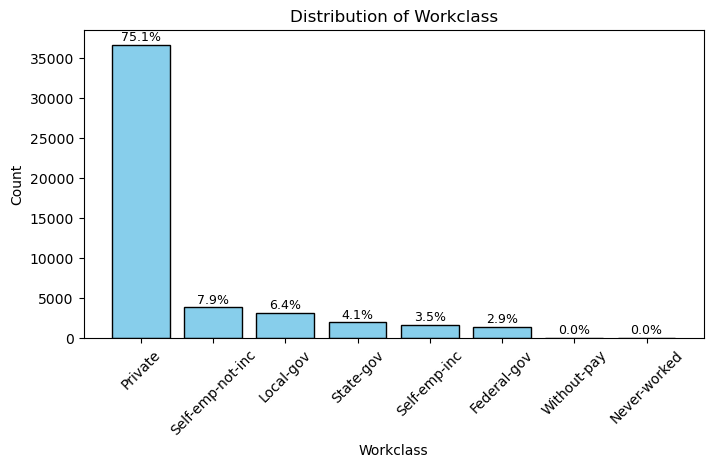

In [46]:
# Workclass Bar chart
workclass = adult_df['workclass'].value_counts()
total = workclass.sum()

plt.figure(figsize=(8, 4))
bars = plt.bar(workclass.index, workclass.values, color='skyblue', edgecolor='black')
plt.title('Distribution of Workclass')
plt.xlabel('Workclass')
plt.ylabel('Count')
plt.xticks(rotation=45)
for bar in bars:
    pct = (bar.get_height() / total) * 100
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 100, 
             f'{pct:.1f}%', 
             ha='center', va='bottom', fontsize=9)
plt.show()


8 Values: Private, Self-emp-inc, Self-emp-not-inc, Local-gov, State-gov, Federal-gov, Without-pay, Never-worked Insights:

Most people work in the private sector (75%).

Self-employed and government roles form a much smaller share.

Steps that can be taken: "Without-pay" and "Never-worked" could be grouped as “Other” or excluded depending on their impact. Encoding methods like label or one-hot encoding can be applied here.
    
(Label encoding and one-hot encoding are two common methods for converting categorical data into numerical data that machine learning algorithms can understand. 
 - Label encoding assigns a unique integer to each category
 - One-hot encoding creates a binary representation for each category, where one category is represented as 1 and the others as 0.)

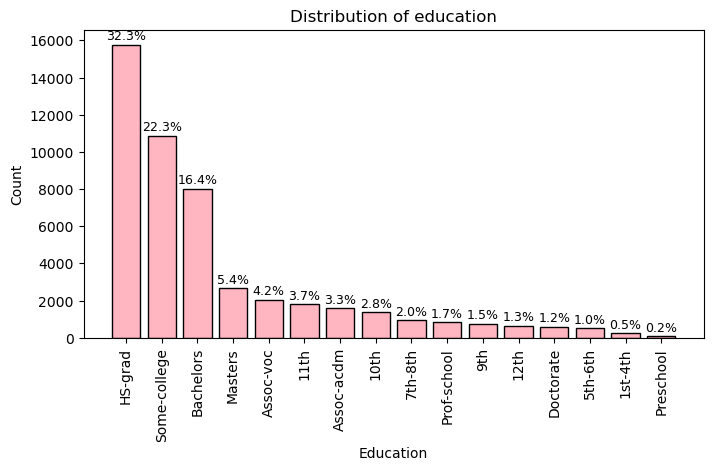

In [48]:
# Education Bar chart
education = adult_df['education'].value_counts()
total = education.sum()

plt.figure(figsize=(8, 4))
bars = plt.bar(education.index, education.values, color='lightpink', edgecolor='black')

plt.title('Distribution of education')
plt.xlabel('Education')
plt.ylabel('Count')
plt.xticks(rotation=90)
for bar in bars:
    pct = (bar.get_height() / total) * 100
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 100, 
             f'{pct:.1f}%', 
             ha='center', va='bottom', fontsize=9)
plt.show()

16 Values: 'Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college', 'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school', '5th-6th', '10th', '1st-4th', 'Preschool', '12th'

Common education levels among people in this dataset are :HS-grad, and Some-college.

There is no imbalance here, but to simplify modeling and improve interpretability, education levels can be grouped into broader categories such as:
       <br> No High School 
         <br>  High School Some 
      <br>  College/Associate 
       <br>    Bachelors 
       <br> Masters/higher

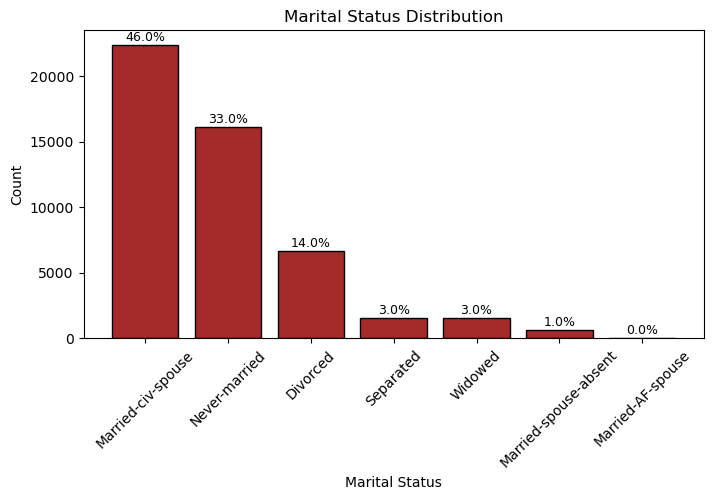

In [49]:
# Marital Status Bar chart
status = adult_df['marital-status'].value_counts()
total = status.sum()

plt.figure(figsize=(8, 4))
bars = plt.bar(status.index, status.values, color='brown', edgecolor='black')
plt.title('Marital Status Distribution')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
for bar in bars:
    pct = round((bar.get_height() / total) * 100)
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 100, 
             f'{pct:.1f}%', 
             ha='center', va='bottom', fontsize=9)
plt.show()

6 Values: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent

Moost frequent category in this feature is Married-civ-spouse(46%).

Other classes like “Widowed” and “Married-spouse-absent” are sparse.

Steps that can be taken: The distribution is balanced. Exploring the correlation with income might give more insight on it's impact.

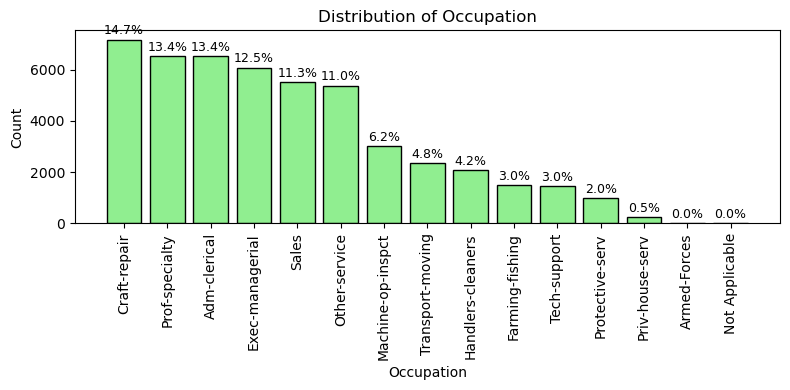

In [47]:
# Occupation bar chart
occupation = adult_df['occupation'].value_counts()
total = occupation.sum()

plt.figure(figsize=(8, 4))
bars = plt.bar(occupation.index, occupation.values, color='lightgreen', edgecolor='black')

plt.title('Distribution of Occupation')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
for bar in bars:
    pct = (bar.get_height() / total) * 100
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 100, 
             f'{pct:.1f}%', 
             ha='center', va='bottom', fontsize=9)
plt.show()

15 Values: 'Adm-clerical', 'Exec-managerial', 'Handlers-cleaners', 'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair', 'Transport-moving', 'Farming-fishing', 'Machine-op-inspct', 'Tech-support', 'Protective-serv', 'Armed-Forces', 'Priv-house-serv','Not Applicable'
Craft-repair is the most frquent category. 

<br>Steps that can be taken:A bivariate analysis can further uncover how specific job types influence income.


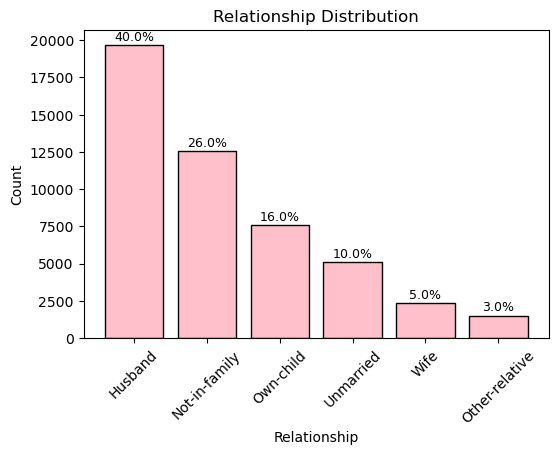

In [50]:
# Relationship Bar chart
Relationship = adult_df['relationship'].value_counts()
total = Relationship.sum()

plt.figure(figsize=(6, 4))
bars = plt.bar(Relationship.index, Relationship.values, color='pink', edgecolor='black')
plt.title('Relationship Distribution')
plt.xlabel('Relationship')
plt.ylabel('Count')
plt.xticks(rotation=45)
for bar in bars:
    pct = round((bar.get_height() / total) * 100)
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 100, 
             f'{pct:.1f}%', 
             ha='center', va='bottom', fontsize=9)
plt.show()

Values: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried
Husband, Not-in-family, and Own-child are most frequent categories in this column.
The distribution seems balanced.
    

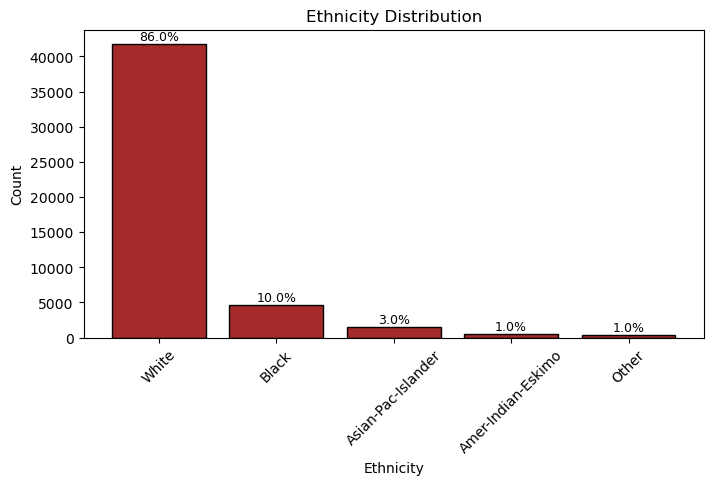

In [45]:
# Ethnicity Bar chart
ethnicity = adult_df['race'].value_counts()
total = ethnicity.sum()

plt.figure(figsize=(8, 4))
bars = plt.bar(ethnicity.index, ethnicity.values, color='brown', edgecolor='black')
plt.title('Ethnicity Distribution')
plt.xlabel('Ethnicity')
plt.ylabel('Count')
plt.xticks(rotation=45)
for bar in bars:
    pct = round((bar.get_height() / total) * 100)
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 100, 
             f'{pct:.1f}%', 
             ha='center', va='bottom', fontsize=9)
plt.show()

Values: White, Black, Asian-Pac-Islander, Amer-Indian-Eskimo, Other

86% of the individuals are white in this dataset, which indicates strong imbalance and dominace among the ethnic groups. 

strategies like sampling, stratification, or class weights can be applied during model training.

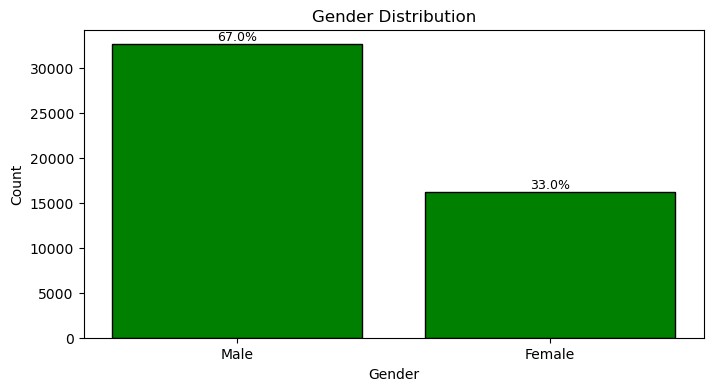

In [44]:
# Gender Bar chart
gender = adult_df['sex'].value_counts()
total = gender.sum()

plt.figure(figsize=(8, 4))
bars = plt.bar(gender.index, gender.values, color='green', edgecolor='black')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
for bar in bars:
    pct = round((bar.get_height() / total) * 100)
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 100, 
             f'{pct:.1f}%', 
             ha='center', va='bottom', fontsize=9)
plt.show()

Values: Male, Female

Fairly balanced - with males at 67% and Females at 33% considering the workplace gender representation.

Steps that can be taken: Since this is a binary caregorical feature, Label encoding can be done.

[Encoding techniques are used to convert categorical variables into numeric format—which is necessary for machine learning models.
Label Encoding: Converts each category into a unique integer(Example: Male = 0, Female = 1)]

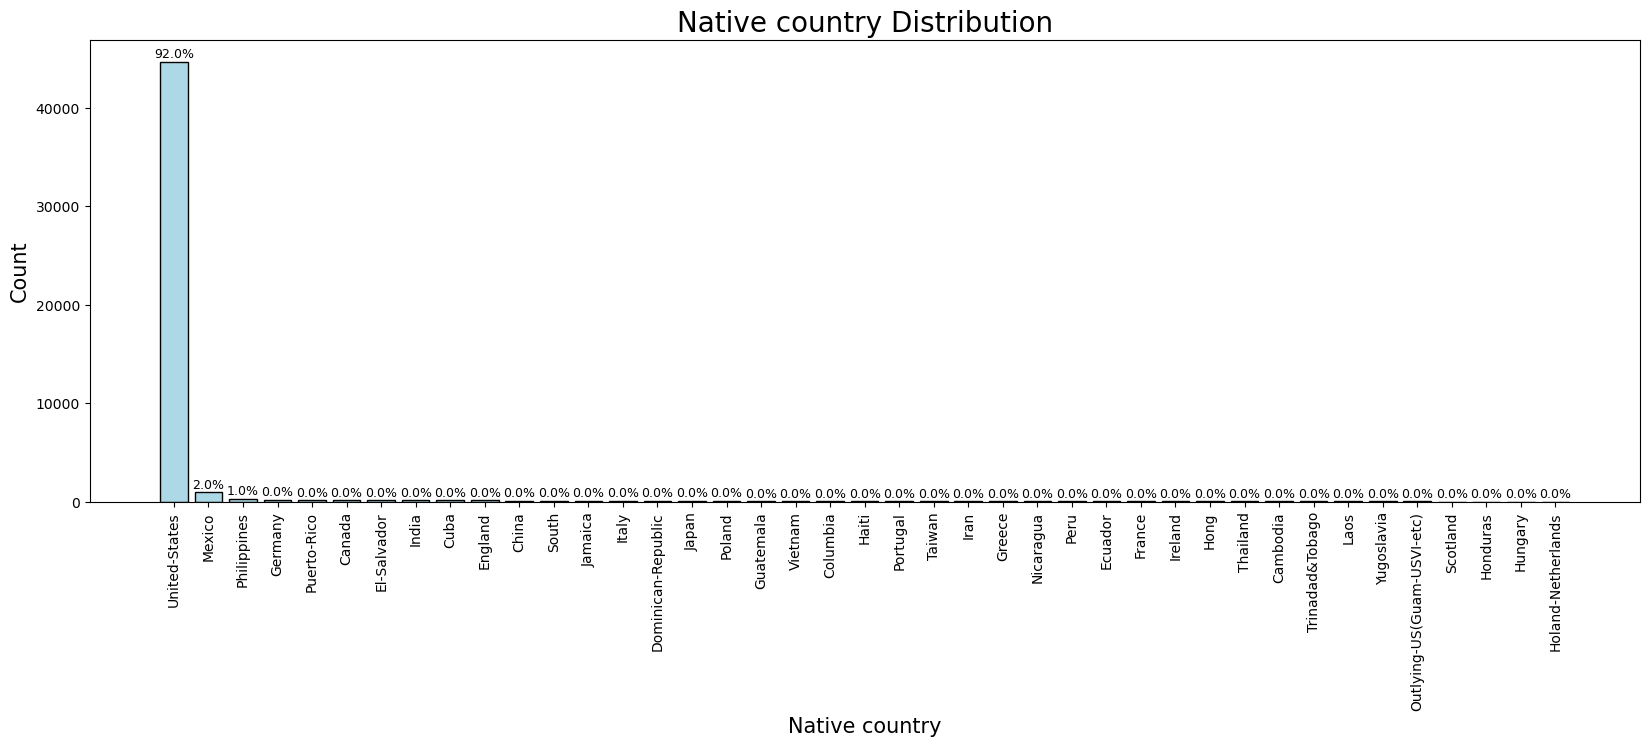

In [51]:
# Native country Bar chart
country = adult_df['native-country'].value_counts()
total = country.sum()

plt.figure(figsize=(20, 6))
bars = plt.bar(country.index, country.values, color='lightblue', edgecolor='black')
plt.title('Native country Distribution', fontsize= 20)
plt.xlabel('Native country',fontsize= 15)
plt.ylabel('Count',fontsize= 15)
plt.xticks(rotation=90)
for bar in bars:
    pct = round((bar.get_height() / total) * 100)
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 100, 
             f'{pct:.1f}%', 
             ha='center', va='bottom', fontsize=9)
plt.show()

Values(40+ countries): United-States, Mexico, Philippines, Germany, etc.

92% of the individuals are from the United States, with other countries sparsely represented. 

This indicates both high cardinality and class imbalance. 

Steps to be taken: Binning countries in smaller numbers into 'Other Countries' category, or using Frequesncy encoding.
    
Frequency Encoding: refers to a categorical encoding technique where each category in a column (like native-country) is replaced by the number of times it appears in the dataset.
    

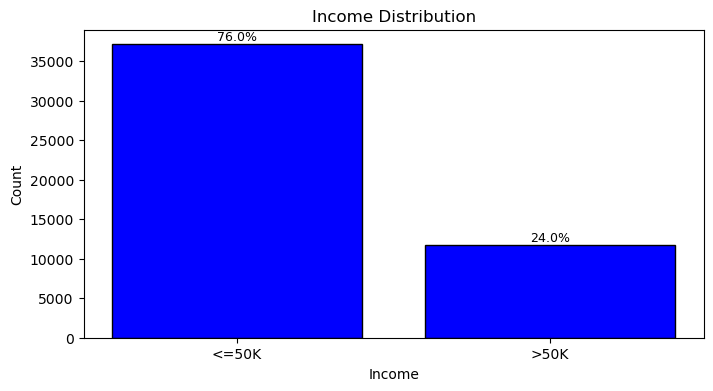

In [43]:
# Income Bar chart
income = adult_df['income'].value_counts()
total = income.sum()

plt.figure(figsize=(8, 4))
bars = plt.bar(income.index, income.values, color='blue', edgecolor='black')
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Count')
# plt.xticks(rotation=45)
for bar in bars:
    pct = round((bar.get_height() / total) * 100)
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 100, 
             f'{pct:.1f}%', 
             ha='center', va='bottom', fontsize=9)
plt.show()


Values: <=50K, >50K

In [52]:
# # Get categorical columns
# cat_cols = adult_df.select_dtypes(include=['object', 'category']).columns.tolist()

# for col in cat_cols:
#     value_counts = adult_df[col].value_counts(dropna=False)
#     top_cat = value_counts.idxmax()
#     top_freq = value_counts.max()
#     top_prop = top_freq / value_counts.sum()

#     # Determine imbalance
#     if top_prop > 0.7:
#         imbalance = f"Highly imbalanced: '{top_cat}' dominates ({top_prop:.1%})"
#         action = "Consider grouping rare classes or balancing"
#     elif top_prop > 0.5:
#         imbalance = f"Moderately imbalanced: '{top_cat}' is frequent ({top_prop:.1%})"
#         action = "May consider reweighting or binning"
#     else:
#         imbalance = "Fairly balanced"
#         action = "No urgent action"

#     # Plot
#     plt.figure(figsize=(10, 4))
#     sns.countplot(data=adult_df, x=col, order=value_counts.index, palette='Set2')
#     plt.title(f"{col} | {imbalance} | Suggested Action: {action}")
#     plt.xticks(rotation=45, ha='right')
#     plt.ylabel('Count')
#     plt.tight_layout()
#     plt.show()


## Numerical Features:

### Skewness: A measure of asymmetry of the data distribution around its mean.

| **Skewness Value** | **Type**                | **Why It Matters**                                                               | **Suggested Actions**                                          |
| ------------------ | ----------------------- | -------------------------------------------------------------------------------- | -------------------------------------------------------------- |
| ≈ 0                | Symmetric               | Most models assume normality.                                                    | Usually no transformation needed.                              |
| > 0                | Right-skewed (positive) | Long tail on the right. Mean > Median. Can distort parametric model assumptions. | Apply **log**, **square root**, or **Box-Cox** transformation. |
| < 0                | Left-skewed (negative)  | Long tail on the left. Mean < Median. Can affect scaling and imputation.         | Apply **square**, **cube**, or **reflect-log** transformation. |


### Kurtosis: A measure of the tailedness (presence of outliers) of a distribution, compared to a normal distribution.

| **Kurtosis Value** | **Type**                  | **Why It Matters**                                                                          | **Suggested Actions**                                             |
| ------------------ | ------------------------- | ------------------------------------------------------------------------------------------- | ----------------------------------------------------------------- |
| < 3                | Platykurtic (light tails) | Fewer extreme values than normal. May underestimate variability.                            | Usually safe; no immediate action.                                |
| = 3                | Mesokurtic (normal tails) | Ideal for many models; reflects normal distribution.                                        | No action needed.                                                 |
| > 3                | Leptokurtic (heavy tails) | Indicates extreme values or outliers are common. May distort models or metrics (like RMSE). | Use **outlier capping**, **winsorization**, or **robust models**. |


### Variance: The average squared deviation from the mean. It measures the spread or dispersion of values.

| **Variance Level** | **Spread Type**       | **Why It Matters**                                                        | **Suggested Actions**                                               |
| ------------------ | --------------------- | ------------------------------------------------------------------------- | ------------------------------------------------------------------- |
| ≈ 0 – 10           | Low variance          | Feature may be constant or near-constant; contributes little to learning. | Consider **dropping** such features.                                |
| 10 – 1000          | Moderate variance     | Typically usable; contains meaningful spread.                             | May use **standardization** if model sensitive to scale.            |
| > 1000             | High/Extreme variance | Can dominate distance metrics; can inflate loss metrics in regression.    | Apply **standard scaler**, **robust scaler**, or **log transform**. |


#### Univariate Analysis for Numeric features using Histograms, Boxplots and Density Plots

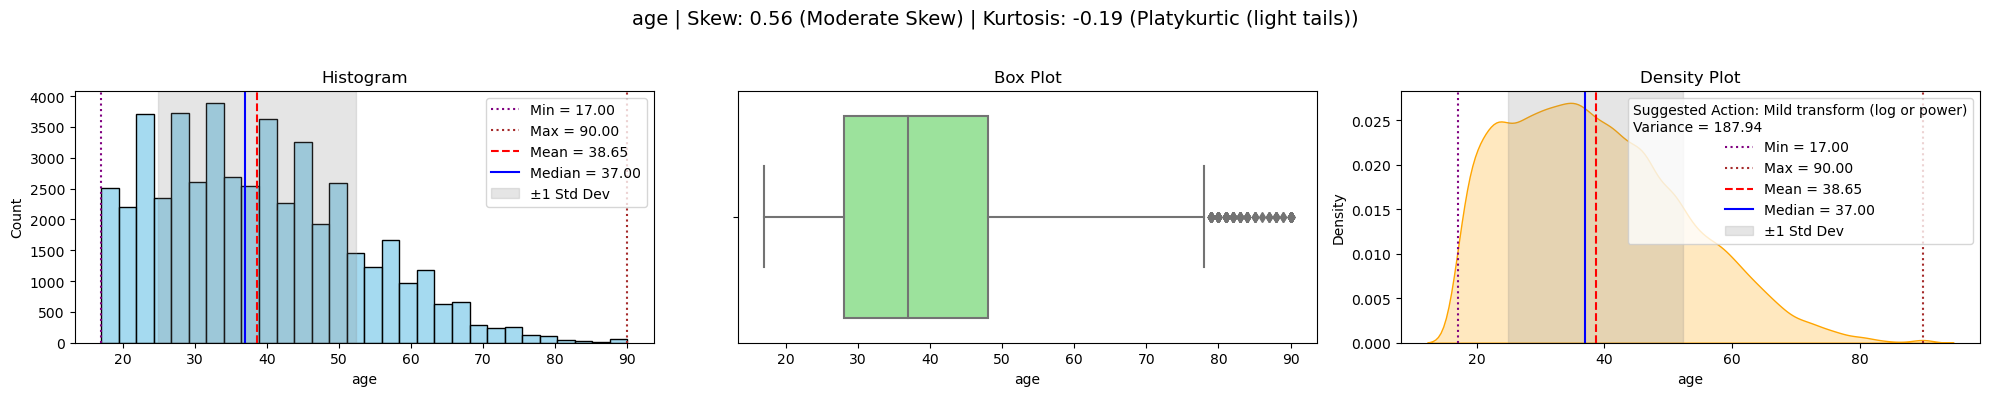

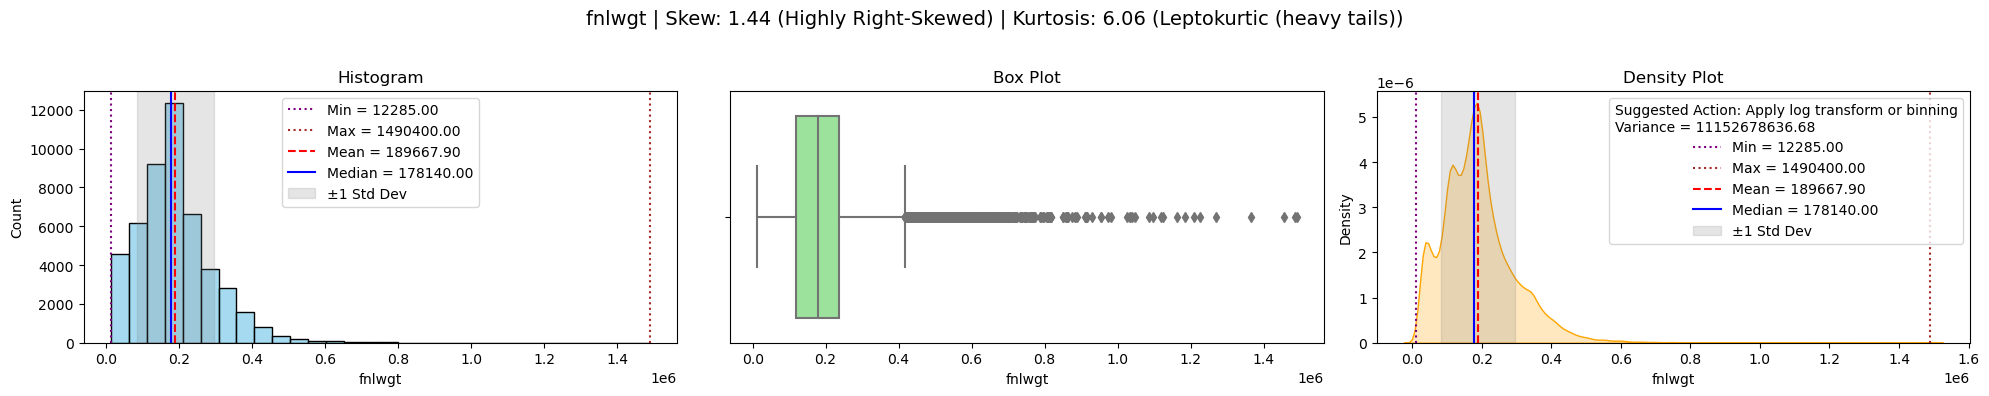

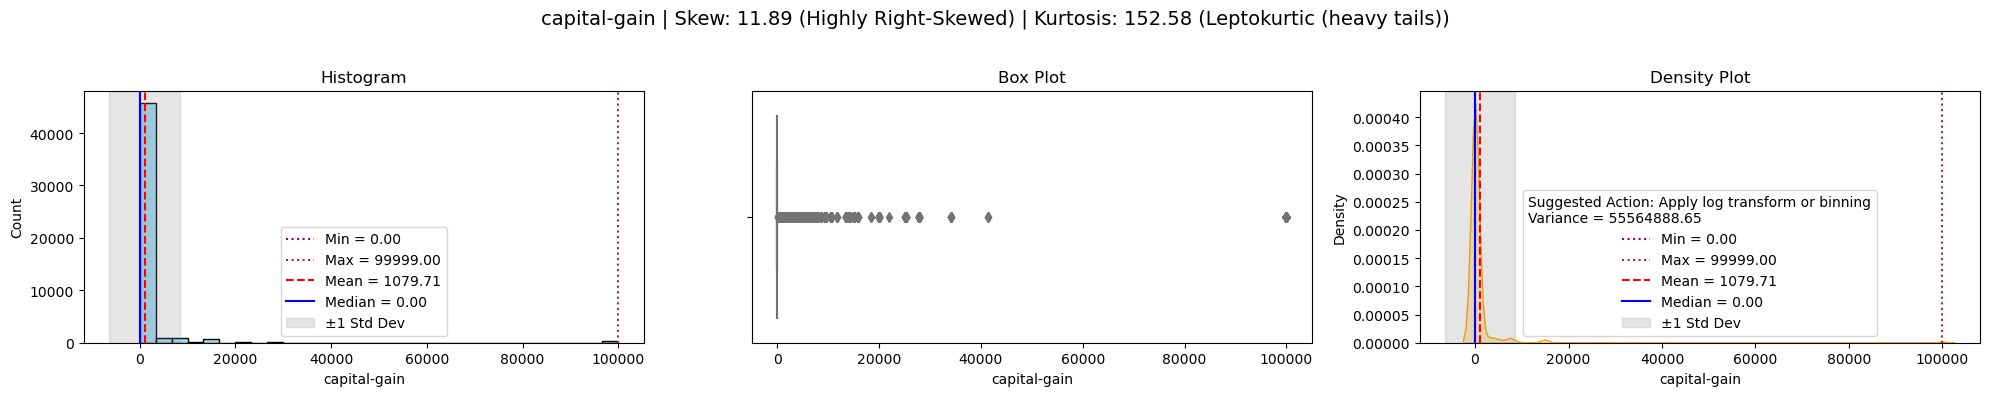

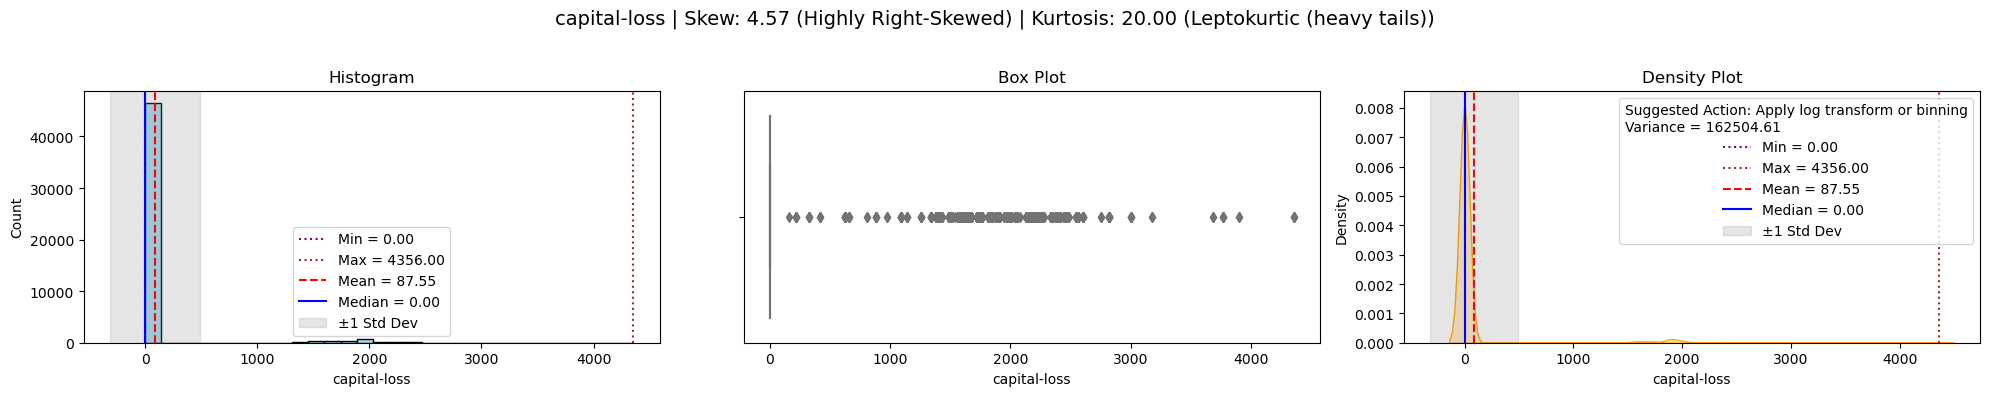

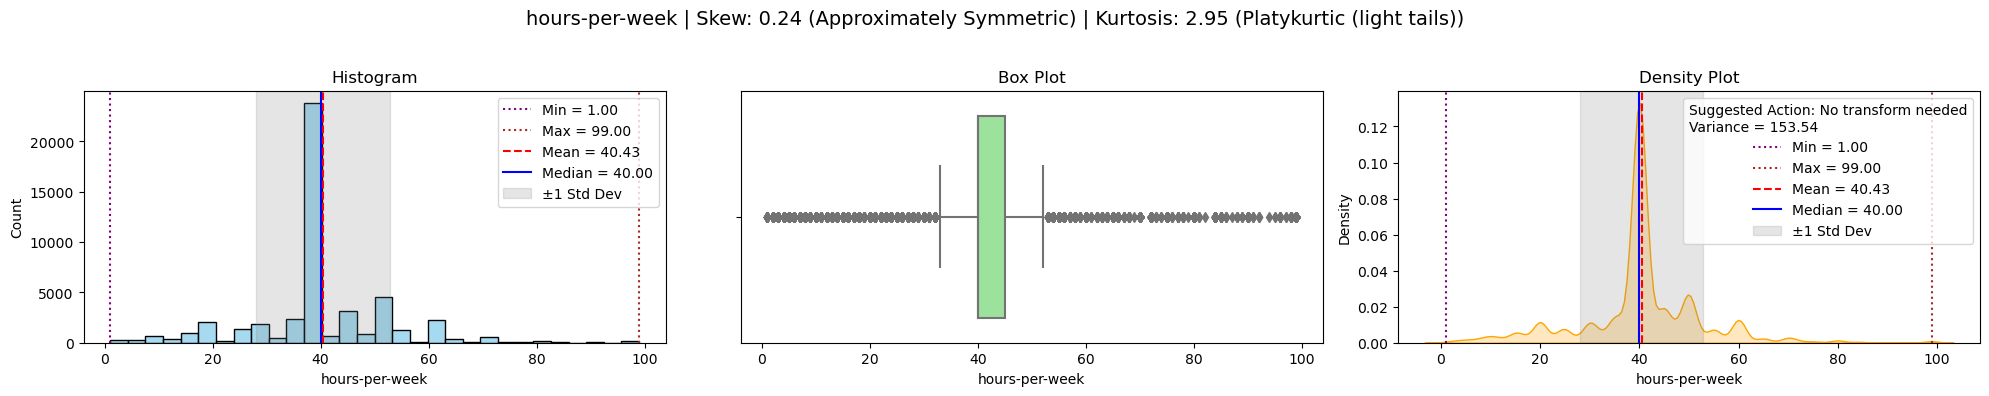

In [60]:
# Get numerical columns
num_cols = adult_df.select_dtypes(include=['int64', 'float64']).columns.tolist()

for col in num_cols:
    data = adult_df[col].dropna()
    
    # Descriptive statistics
    mean_val = data.mean()
    median_val = data.median()
    min_val = data.min()
    max_val = data.max()
    std_val = data.std()
    var_val = data.var()
    skew_val = skew(data)
    kurt_val = kurtosis(data)

    # Define skewness insight
    if skew_val > 1:
        skew_insight = "Highly Right-Skewed"
        action = "Apply log transform or binning"
    elif skew_val < -1:
        skew_insight = "Highly Left-Skewed"
        action = "Apply power transform"
    elif -0.5 < skew_val < 0.5:
        skew_insight = "Approximately Symmetric"
        action = "No transform needed"
    else:
        skew_insight = "Moderate Skew"
        action = "Mild transform (log or power)"

    # Define kurtosis insight
    if kurt_val > 3:
        kurt_insight = "Leptokurtic (heavy tails)"
    elif kurt_val < 3:
        kurt_insight = "Platykurtic (light tails)"
    else:
        kurt_insight = "Mesokurtic (normal-like)"

    title = f"{col} | Skew: {skew_val:.2f} ({skew_insight}) | Kurtosis: {kurt_val:.2f} ({kurt_insight})"

    # Plot setup
    fig, axes = plt.subplots(1, 3, figsize=(20, 4))
    fig.suptitle(title, fontsize=14)

    # Histogram
    sns.histplot(data, bins=30, kde=False, ax=axes[0], color='skyblue')
    axes[0].set_title('Histogram')

    # Add vertical lines to histogram
    axes[0].axvline(min_val, color='purple', linestyle=':', label=f"Min = {min_val:.2f}")
    axes[0].axvline(max_val, color='brown', linestyle=':', label=f"Max = {max_val:.2f}")
    axes[0].axvline(mean_val, color='red', linestyle='--', label=f"Mean = {mean_val:.2f}")
    axes[0].axvline(median_val, color='blue', linestyle='-', label=f"Median = {median_val:.2f}")
    
    # Add shaded area for ±1 std (approx. 68% of data if normal)
    axes[0].axvspan(mean_val - std_val, mean_val + std_val, alpha=0.2, color='gray', label=f"±1 Std Dev")

    axes[0].legend()

    # Boxplot
    sns.boxplot(x=data, ax=axes[1], color='lightgreen')
    axes[1].set_title('Box Plot')

    # KDE plot
    sns.kdeplot(data, ax=axes[2], fill=True, color='orange')
    axes[2].axvline(min_val, color='purple', linestyle=':', label=f"Min = {min_val:.2f}")
    axes[2].axvline(max_val, color='brown', linestyle=':', label=f"Max = {max_val:.2f}")
    axes[2].axvline(mean_val, color='red', linestyle='--', label=f"Mean = {mean_val:.2f}")
    axes[2].axvline(median_val, color='blue', linestyle='-', label=f"Median = {median_val:.2f}")
    axes[2].axvspan(mean_val - std_val, mean_val + std_val, alpha=0.2, color='gray', label="±1 Std Dev")

    axes[2].legend(title=f"Suggested Action: {action}\nVariance = {var_val:.2f}")
    axes[2].set_title('Density Plot')

    plt.tight_layout(rect=[0, 0, 1, 0.95])  # leave space for suptitle
    plt.show()


#### Categorical Features Summary

#### Numerical Features Summary

In [62]:
def summarize_categorical(df, cat_cols, imbalance_threshold=0.8):
    rows = []
    for col in cat_cols:
        data = df[col].dropna()
        cardinality = data.nunique()
        mode = data.mode()[0] if not data.mode().empty else np.nan
        freq = data.value_counts().iloc[0] if not data.value_counts().empty else 0
        prop = freq / len(data) if len(data) > 0 else 0
        imbalance = "Yes" if prop > imbalance_threshold else "No"
        suggestion = ""
        if cardinality > 20:
            suggestion += "High cardinality: consider encoding or grouping. "
        if imbalance == "Yes":
            suggestion += "Class imbalance: consider sampling or weighting."
        if suggestion == "":
            suggestion = "No urgent action needed."
        rows.append({
            "Column": col,
            "Cardinality": cardinality,
            "Most Frequent Category": mode,
            "Frequency (Count)": freq,
            "Frequency (Proportion)": round(prop, 2),
            "Imbalance Flag": imbalance,
            "Suggested Actions": suggestion.strip()
        })
    return pd.DataFrame(rows)

# Get categorical columns
cat_cols = adult_df.select_dtypes(include=['object', 'category']).columns.tolist()

# Generate summary
cat_summary = summarize_categorical(adult_df, cat_cols)

# Define a function to highlight the entire row if suggested actions are needed
def highlight_row(row):
    if row['Suggested Actions'] != "No urgent action needed.":
        return ['background-color: orange'] * len(row)
    else:
        return [''] * len(row)

# Apply the styling
styled_cat_summary = cat_summary.style.apply(highlight_row, axis=1)

# Display styled DataFrame (in Jupyter Notebook or compatible environment)
styled_cat_summary


,Column,Cardinality,Most Frequent Category,Frequency (Count),Frequency (Proportion),Imbalance Flag,Suggested Actions
0,workclass,8,Private,36678,0.750000,No,No urgent action needed.
1,education,16,HS-grad,15777,0.320000,No,No urgent action needed.
2,education-num,16,9,15777,0.320000,No,No urgent action needed.
3,marital-status,7,Married-civ-spouse,22372,0.460000,No,No urgent action needed.
4,occupation,15,Craft-repair,7179,0.150000,No,No urgent action needed.
5,relationship,6,Husband,19709,0.400000,No,No urgent action needed.
6,race,5,White,41736,0.860000,Yes,Class imbalance: consider sampling or weighting.
7,sex,2,Male,32631,0.670000,No,No urgent action needed.
8,native-country,41,United-States,44666,0.920000,Yes,High cardinality: consider encoding or grouping. Class imbalance: consider sampling or weighting.
9,income,2,<=50K,37128,0.760000,No,No urgent action needed.


In [61]:
def summarize_categorical(df, cat_cols, imbalance_threshold=0.8):
    rows = []
    for col in cat_cols:
        data = df[col].dropna()
        cardinality = data.nunique()
        mode = data.mode()[0] if not data.mode().empty else np.nan
        freq = data.value_counts().iloc[0] if not data.value_counts().empty else 0
        prop = freq / len(data) if len(data) > 0 else 0
        imbalance = "Yes" if prop > imbalance_threshold else "No"
        suggestion = ""
        if cardinality > 20:
            suggestion += "High cardinality: consider encoding or grouping. "
        if imbalance == "Yes":
            suggestion += "Class imbalance: consider sampling or weighting."
        if suggestion == "":
            suggestion = "No urgent action needed."
        rows.append({
            "Column": col,
            "Cardinality": cardinality,
            "Most Frequent Category": mode,
            "Frequency (Count)": freq,
            "Frequency (Proportion)": round(prop, 2),
            "Imbalance Flag": imbalance,
            "Suggested Actions": suggestion.strip()
        })
    return pd.DataFrame(rows)

# Get categorical columns
cat_cols = adult_df.select_dtypes(include=['object', 'category']).columns.tolist()

# Generate summary
cat_summary = summarize_categorical(adult_df, cat_cols)

# Define a function to highlight the entire row if suggested actions are needed
def highlight_row(row):
    if row['Suggested Actions'] != "No urgent action needed.":
        return ['background-color: lightyellow'] * len(row)
    else:
        return [''] * len(row)

# Apply the styling
styled_cat_summary = cat_summary.style.apply(highlight_row, axis=1)

# Display styled DataFrame (in Jupyter Notebook or compatible environment)
styled_cat_summary

from scipy.stats import skew, kurtosis

def skew_type(sk):
    if abs(sk) < 0.5:
        return "Approximately symmetric"
    elif 0.5 <= sk < 1:
        return "Moderately right-skewed"
    elif sk >= 1:
        return "Heavily right-skewed"
    elif -1 < sk <= -0.5:
        return "Moderately left-skewed"
    else:
        return "Heavily left-skewed"

def kurtosis_type(kt):
    kt += 3  # excess to normal kurtosis
    if kt < 3:
        return "Platykurtic (light tails)"
    elif kt == 3:
        return "Mesokurtic (normal tails)"
    else:
        return "Leptokurtic (heavy tails)"

def variance_spread(v):
    if v < 10:
        return "Low spread"
    elif v < 1000:
        return "Moderate spread"
    else:
        return "High/Extreme spread"

def suggest_transform(sk, kt, var):
    kt += 3
    suggestions = []
    if abs(sk) >= 0.5:
        suggestions.append("Log/sqrt transform")
    if kt > 3:
        suggestions.append("Outlier treatment")
    if var > 1000:
        suggestions.append("Scaling (robust/standard)")
    if not suggestions:
        return "No urgent transformation needed"
    return "; ".join(suggestions)

# Calculate summary DataFrame
def summarize_df_with_style(df, numeric_cols):
    rows = []
    for col in numeric_cols:
        data = df[col].dropna()
        sk = skew(data)
        kt = kurtosis(data)
        var = data.var()
        rows.append({
            "Column": col,
            "Skewness": round(sk, 2),
            "Skew Type": skew_type(sk),
            "Kurtosis": round(kt + 3, 2),
            "Kurtosis Type": kurtosis_type(kt),
            "Variance": var,
            "Spread Type": variance_spread(var),
            "Suggested Transformation / Future Step": suggest_transform(sk, kt, var)
        })
    summary = pd.DataFrame(rows)

    # Styling functions
    def skew_color(val):
        if val < -1:
            color = '#add8e6'  # light blue for heavy left skew
        elif -1 <= val < -0.5:
            color = '#cce5ff'  # lighter blue for moderate left skew
        elif 0.5 <= val < 1:
            color = '#ffd699'  # light orange for moderate right skew
        elif val >= 1:
            color = '#ffb366'  # darker orange for heavy right skew
        else:
            color = ''
        return f'background-color: {color}'

    def kurtosis_color(val):
        if val < 3:
            color = '#d5f5e3'  # light green (platykurtic)
        elif val == 3:
            color = '#f7dc6f'  # yellow (mesokurtic)
        else:
            color = '#f1948a'  # light red (leptokurtic)
        return f'background-color: {color}'

    def variance_color(val):
        if val < 10:
            color = '#d1f2eb'  # very light teal (low spread)
        elif val < 1000:
            color = '#a9dfbf'  # light green (moderate spread)
        else:
            color = '#f5b7b1'  # pinkish (high/extreme spread)
        return f'background-color: {color}'

    # Apply styles to the dataframe
    styled = summary.style \
        .applymap(skew_color, subset=['Skewness']) \
        .applymap(kurtosis_color, subset=['Kurtosis']) \
        .applymap(variance_color, subset=['Variance']) \
        .set_properties(subset=['Suggested Transformation / Future Step'], **{'font-weight': 'bold', 'color': 'darkblue'})

    return styled

# Usage with your dataframe and numeric columns
numeric_cols = adult_df.select_dtypes(include=[np.number]).columns.tolist()
styled_summary = summarize_df_with_style(adult_df, numeric_cols)
styled_summary  # in Jupyter, this will render a nice colored table


,Column,Skewness,Skew Type,Kurtosis,Kurtosis Type,Variance,Spread Type,Suggested Transformation / Future Step
0,age,0.560000,Moderately right-skewed,2.810000,Platykurtic (light tails),187.936808,Moderate spread,Log/sqrt transform
1,fnlwgt,1.440000,Heavily right-skewed,9.060000,Leptokurtic (heavy tails),11152678636.675930,High/Extreme spread,Log/sqrt transform; Outlier treatment; Scaling (robust/standard)
2,capital-gain,11.890000,Heavily right-skewed,155.580000,Leptokurtic (heavy tails),55564888.653738,High/Extreme spread,Log/sqrt transform; Outlier treatment; Scaling (robust/standard)
3,capital-loss,4.570000,Heavily right-skewed,23.000000,Leptokurtic (heavy tails),162504.609385,High/Extreme spread,Log/sqrt transform; Outlier treatment; Scaling (robust/standard)
4,hours-per-week,0.240000,Approximately symmetric,5.950000,Leptokurtic (heavy tails),153.535750,Moderate spread,Outlier treatment
